In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

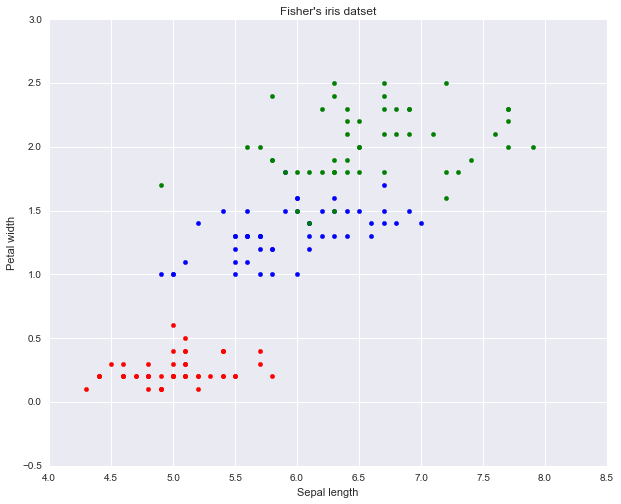

In [2]:
# Load
iris = load_iris()

# Get features and ground truth
X = iris.data
Y = iris.target

# Extract sepal length and petal width features (0 and 3)
X03 = np.append(X[:,0:1], X[:,3:4], axis=1)

# Figure
plt.figure(figsize=(10,8))

# Scatter plot of the data points
plt.scatter(X[Y==0,0], X[Y==0,3], color='red')
plt.scatter(X[Y==1,0], X[Y==1,3], color='blue')
plt.scatter(X[Y==2,0], X[Y==2,3], color='green')

# Labels
plt.title('Fisher\'s iris datset')
plt.xlabel('Sepal length')
plt.ylabel('Petal width')

# Show
plt.show()

C=1

def clf_decision_surface_plot(clf):
    # Generate the co-ordinates at which we will ask the classifier to predict class probabilities
    xx, yy = np.meshgrid(np.arange(4.0, 8.5, 0.01), np.arange(-0.5, 3.0, 0.01))

    # Predict classes for all grid points
    Y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot the contours of the boundaries corresponding to each class
    plt.figure(figsize=(10,8))
    plt.contourf(xx, yy, (Y_pred == 0).reshape(xx.shape), 1, cmap='OrRd', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 1).reshape(xx.shape), 1, cmap='Blues', alpha=.4)
    plt.contourf(xx, yy, (Y_pred == 2).reshape(xx.shape), 1, cmap='Greens', alpha=.4)

    # Plot the data points
    plt.scatter(X[Y==0,0], X[Y==0,3], color='red')
    plt.scatter(X[Y==1,0], X[Y==1,3], color='blue')
    plt.scatter(X[Y==2,0], X[Y==2,3], color='green')

    # Labels and then plot it
    plt.title('Fisher\'s iris datset')
    plt.xlabel('Sepal length')
    plt.ylabel('Petal width')
    plt.show()

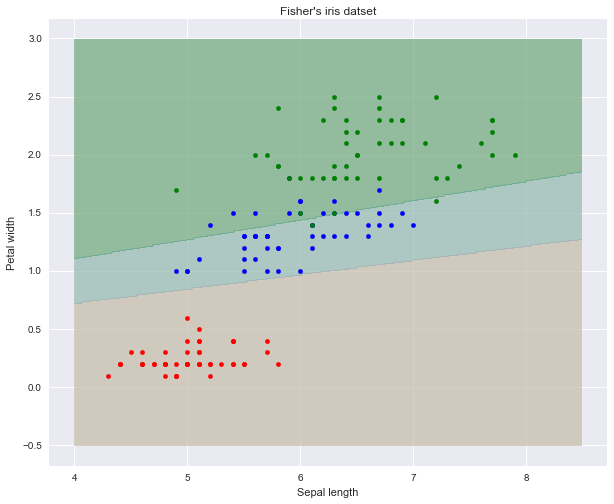

Accuracy= 0.906666666667


In [3]:
# Logistic Regression classifier
lr_clf = LogisticRegression(C=C)
lr_clf.fit(X03, Y)
clf_decision_surface_plot(lr_clf)
print('Accuracy=', lr_clf.score(X03, Y))

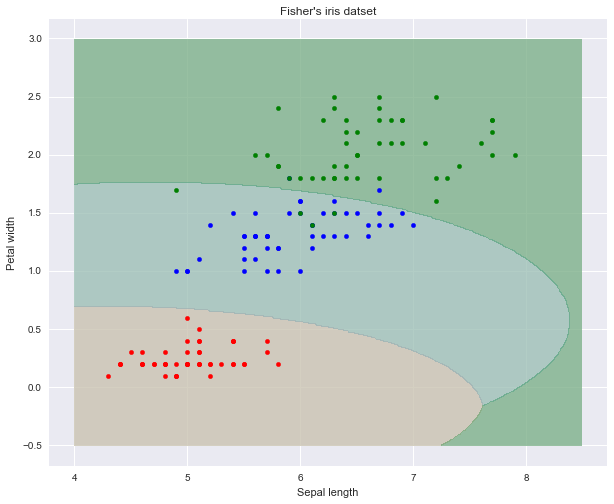

Accuracy= 0.96


In [4]:
# Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X03, Y)
clf_decision_surface_plot(nb_clf)
print('Accuracy=', nb_clf.score(X03, Y))

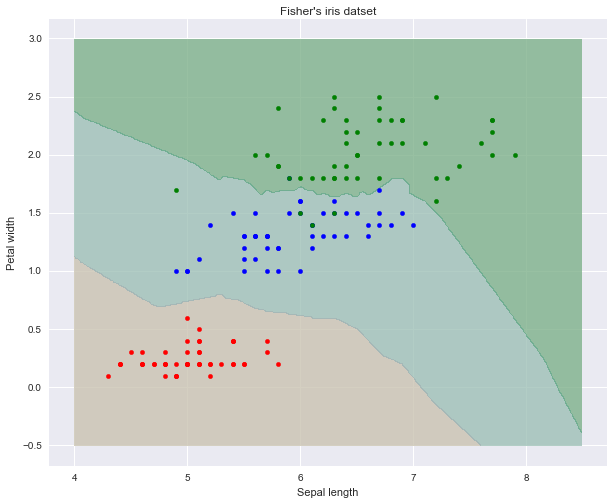

Accuracy= 0.966666666667


In [5]:
# Build a nearest neighbours classifier that uses the 3 nearest neighbours to make a decision
nn_clf = KNeighborsClassifier(3)
nn_clf.fit(X03, Y)
clf_decision_surface_plot(nn_clf)
print('Accuracy=', nn_clf.score(X03, Y))

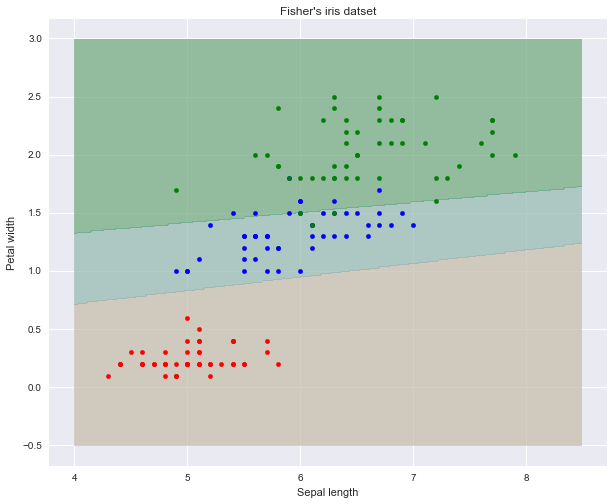

Accuracy= 0.92


In [6]:
# Linear SVC classifier
lclf = LinearSVC(C=C)
lclf.fit(X03, Y)
clf_decision_surface_plot(lclf)
print('Accuracy=', lclf.score(X03, Y))

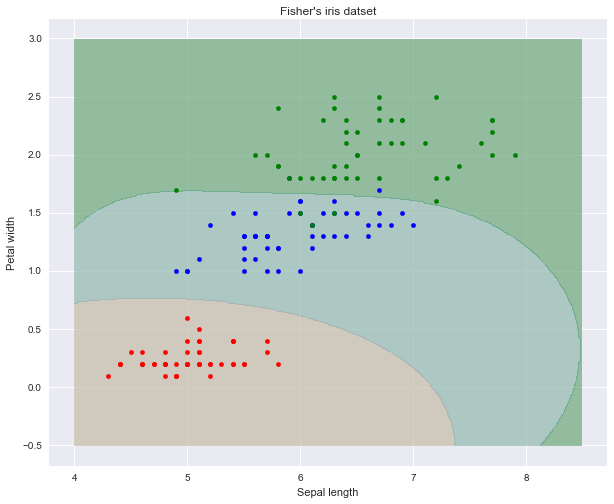

Accuracy= 0.966666666667


In [7]:
# SVC classifier
svc_clf = SVC(C=C)
svc_clf.fit(X03, Y)
clf_decision_surface_plot(svc_clf)
print('Accuracy=', svc_clf.score(X03, Y))

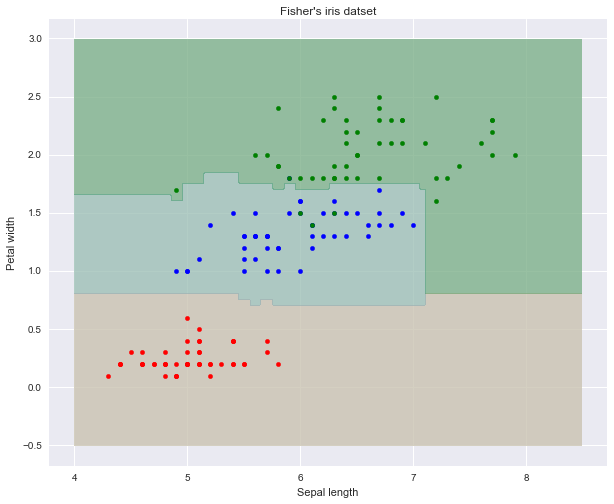

Accuracy= 0.973333333333


In [8]:
# Random Forest classifier
fclf = RandomForestClassifier(n_estimators=150)
fclf.fit(X03, Y)
clf_decision_surface_plot(fclf)
print('Accuracy=', fclf.score(X03, Y))